#   Question 2 

#    KNN Zoo Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
zoo_data = pd.read_csv("Zoo.csv")
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


###  Preprocessing the dataset 

In [3]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
zoo_data.duplicated().value_counts()

False    101
dtype: int64

In [5]:
label_encoder = preprocessing.LabelEncoder()
zoo_data["animal name"] = label_encoder.fit_transform(zoo_data["animal name"])

###  Splitting the dataset

In [6]:
x = zoo_data.iloc[:,0:17]
y = zoo_data.iloc[:,17]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

###  Standardize the train and test variable 

In [18]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

### Finding the best value for n_neighbours 

E:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
E:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
E:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
E:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
E:\ProgramData\anaconda3\lib\site-packages\s

Text(0, 0.5, 'Cross-Validated Accuracy')

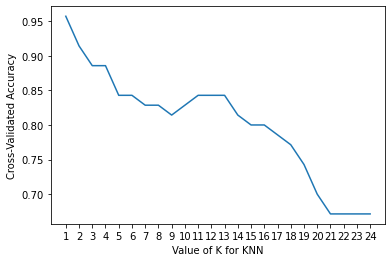

In [20]:
k_range = range(1, 25)
k_scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

###   Building the KNN Model

In [21]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

###  Predict the KNN Model

In [22]:
y_pred = model.predict(x_test)
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1, 1, 2, 4, 3, 4], dtype=int64)

###  Evaluate the Model

<AxesSubplot:>

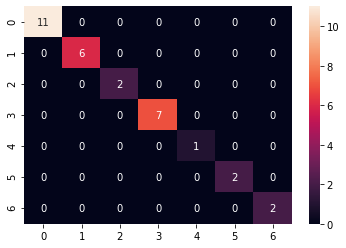

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [24]:
accuracy_score(y_test,y_pred)

1.0

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



###  Using KNN Model got an accuracy of 100% for k = 2